# Data understanding, motivation, results, and conclusions



## Data understanding


The dataset is a direct copy of the Bank Transaction Dataset for Fraud Detection from Kaggle. The dataset was last updated on 04/11/2024.


This dataset provides a detailed look into transactional behavior and financial activity patterns, ideal for exploring fraud detection and anomaly identification. It contains 2,512 samples of transaction data, covering various transaction attributes, customer demographics, and usage patterns. Each entry offers comprehensive insights into transaction behavior, enabling analysis for financial security and fraud detection applications.

The dataset was synthesized based on realistic bank transaction patterns from publicly available sources, including research studies, industry reports, fraud detection surveys and other relevant studies.


The dataset is made up of individual transactions made from 2023-01-03 to 2024-01-02,


Link: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection




## Motivation

This is a practice of EDA and machine learning application on banking data.

At the end of the project, the goals include:
1. Performed well-coded EDA with valueable insights.
2. Developed a clustering model that properly segment transactions and accounts.
3. Codes are well-documented and pythonic.

## Result
(To be filled after finishing)

## Conclusions
(To be filled after finishing)

## Limitations
(To be filled after finishing)

# Importing libraries and data

In [173]:
# Import libraries

# General data analytics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime handlers
import datetime as dt
import calendar

# Map visualization
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px
from tqdm import tqdm


# Machine learning
# Pre-processing + transformers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Model training
from sklearn.cluster import KMeans


#import libraries for model evaluation
from sklearn import metrics #Import scikit-learn metrics module for model evaluation


# Model optimization
from sklearn.ensemble import GradientBoostingRegressor


#Ad hoc

In [174]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


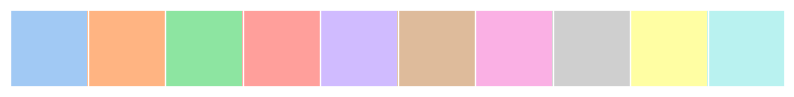

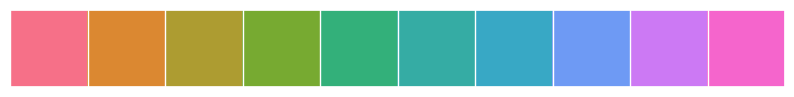

In [203]:
# Presentation-related
pd.set_option('display.max_columns', None)
sns.set_theme(rc={'figure.figsize': (12, 5)})

# Color palette
palette = sns.color_palette('pastel') # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
sns.palplot(sns.color_palette('husl', 10)) # Seaborn color palette, with 10 colors
sns.color_palette("rocket", as_cmap=True) # Get a CMap
sns.set_palette('pastel',n_colors=10)

Comment: Even though it is possible to pull data directly from Kaggle, I chose to download it to my drive. This is to avoid potential updates or changes to the online file, making the analysis no longer valid.

In [176]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/Github/3 Bank transaction analysis and fraud detection/bank_transactions_data_2.csv')
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [177]:
# Inspecting data type
print(df.shape)
print(df.dtypes)

(2512, 16)
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [178]:
# Randomly inspecting data examples (inspected AC00460, AC00480, AC00439, AC00356, AC00092)
df1 = df[df['AccountID']== 'AC00092']
df1

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
119,TX000120,AC00092,115.83,2023-05-22 17:09:52,Debit,Fresno,D000663,124.6.134.78,M086,Branch,39,Engineer,167,1,6481.04,2024-11-04 08:10:02
365,TX000366,AC00092,632.69,2023-09-12 16:28:38,Debit,Denver,D000455,211.97.88.141,M047,ATM,80,Retired,76,1,4363.74,2024-11-04 08:09:26
516,TX000517,AC00092,64.90,2023-02-14 16:23:39,Credit,Detroit,D000165,45.246.89.225,M043,Branch,51,Retired,72,1,6854.61,2024-11-04 08:10:18
667,TX000668,AC00092,373.27,2023-07-18 18:03:03,Credit,Miami,D000090,35.67.21.23,M053,Online,61,Doctor,79,1,8441.61,2024-11-04 08:06:36
775,TX000776,AC00092,173.74,2023-09-08 17:48:22,Debit,Houston,D000127,161.177.41.214,M074,Online,80,Retired,64,1,4913.42,2024-11-04 08:11:52
845,TX000846,AC00092,793.13,2023-05-10 16:38:07,Debit,Memphis,D000518,173.232.121.213,M035,Online,68,Doctor,76,1,13389.16,2024-11-04 08:09:45
1034,TX001035,AC00092,98.03,2023-12-18 18:41:26,Debit,El Paso,D000697,49.20.211.229,M095,Branch,54,Engineer,165,1,6323.45,2024-11-04 08:08:36
1401,TX001402,AC00092,66.01,2023-10-06 18:39:39,Debit,Milwaukee,D000317,49.172.82.247,M042,Online,49,Engineer,179,1,3475.99,2024-11-04 08:07:05


Looking at data grouped by AccountID, there is some confusion at how the data was created. For the same account, there are vastly different CustomerAge registered while the transactions only spanned 2 years. CustomerOccupation seems to be varying unlogically as well. This goes back to how the data were synthesized. Based on features' description, it seems like data variance of a feature is usually based on one or two other features only. We will such description as guide to properly extract patterns. It should be noted that this would unlikely be the case for a real-life dataset where logics are much more complicated and interconnected.

# Data cleaning

## 1. Missing data

In [179]:
# Checking for missing data
for colu in df.columns:
  print('{} is missing: '.format(colu),df[colu].isna().sum(),' entries')

TransactionID is missing:  0  entries
AccountID is missing:  0  entries
TransactionAmount is missing:  0  entries
TransactionDate is missing:  0  entries
TransactionType is missing:  0  entries
Location is missing:  0  entries
DeviceID is missing:  0  entries
IP Address is missing:  0  entries
MerchantID is missing:  0  entries
Channel is missing:  0  entries
CustomerAge is missing:  0  entries
CustomerOccupation is missing:  0  entries
TransactionDuration is missing:  0  entries
LoginAttempts is missing:  0  entries
AccountBalance is missing:  0  entries
PreviousTransactionDate is missing:  0  entries


## 2. Outliers

In [180]:
# Checking stats on the data
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## 3. Data type

In [181]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [182]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Comment: While most variables seem to have been imported in the right data type, date data are being registered as 'object' (nominal) type. I will convert them to date type to reflect their meaning and prepare for later EDA.

In [183]:
# Correcting datetime data
targets = ['TransactionDate','PreviousTransactionDate']

for target in targets:
  df[target] = pd.to_datetime(df[target],format='%Y-%m-%d %H:%M:%S')

df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,datetime64[ns]
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


Comment: Due to lack of information, it is assumed that all datetime data have already been converted to the same timezone and there is no daylight saving adjustment necessary.

In [184]:
# Inspecting some nominal data suspected to be categorical
targets = ['TransactionType','Location','Channel','CustomerOccupation']

for target in targets:
  print(target)
  print(df[target].unique())
  print('')

TransactionType
['Debit' 'Credit']

Location
['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']

Channel
['ATM' 'Online' 'Branch']

CustomerOccupation
['Doctor' 'Student' 'Retired' 'Engineer']



Comment: For variables with only a few unique values, I will convert them to category data to lessen memory usage.

In [185]:
# Converting to categorical, preserving intended order while reducing memmory usage
print('memory usage BEFORE conversion (in bytes)')
print(df.memory_usage().sum())

targets = ['TransactionType','Channel','CustomerOccupation']

for target in targets:
  df[target] = df[target].astype('category')


print('memmory usage AFTER conversion (in bytes)')
print(df.memory_usage().sum())

print(df.dtypes)

memory usage BEFORE conversion (in bytes)
321668
memmory usage AFTER conversion (in bytes)
269376
TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                  category
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                          category
CustomerAge                         int64
CustomerOccupation               category
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


# Exploratory Data Analysis (EDA)

## 1. Univariate analysis

### Unique value counts of ID variables

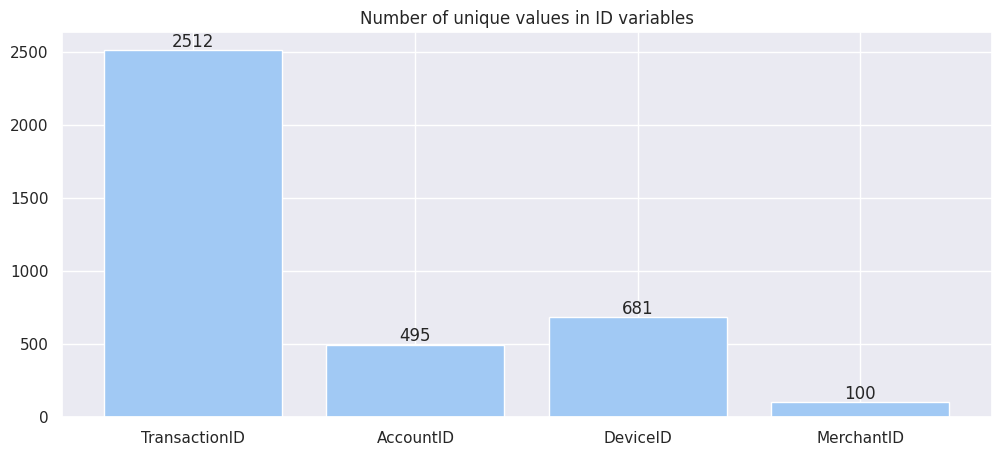

In [204]:
# Visualizing ID data counts
id_vars = ['TransactionID','AccountID','DeviceID','MerchantID']

uniques = []

for var in id_vars:
  unique = len(df[var].unique())
  uniques.append(unique)

plot = plt.bar(id_vars, uniques)
plt.title('Number of unique values in ID variables')
plt.bar_label(plot)

plt.show()

### Exploring temporal data - TransactionDate

In [205]:
# Distilling transaction date variable into a new dateframe
trans_dates = df['TransactionDate'].reset_index()
trans_dates['date'] = trans_dates['TransactionDate'].dt.date
trans_dates['time'] = trans_dates['TransactionDate'].dt.time
trans_dates['weekday']  = trans_dates['TransactionDate'].dt.strftime('%a')
trans_dates['weekday'] = trans_dates['weekday'].astype('category')
trans_dates['weekday'] = trans_dates['weekday'].cat.reorder_categories(new_categories=['Mon','Tue','Wed','Thu','Fri'],ordered=False)

trans_dates.head(10)

,index,TransactionDate,date,time,weekday
0,0,2023-04-11 16:29:14,2023-04-11,16:29:14,Tue
1,1,2023-06-27 16:44:19,2023-06-27,16:44:19,Tue
2,2,2023-07-10 18:16:08,2023-07-10,18:16:08,Mon
3,3,2023-05-05 16:32:11,2023-05-05,16:32:11,Fri
4,4,2023-10-16 17:51:24,2023-10-16,17:51:24,Mon
5,5,2023-04-03 17:15:01,2023-04-03,17:15:01,Mon
6,6,2023-02-15 16:36:48,2023-02-15,16:36:48,Wed
7,7,2023-05-08 17:47:59,2023-05-08,17:47:59,Mon
8,8,2023-03-21 16:59:46,2023-03-21,16:59:46,Tue
9,9,2023-03-31 16:06:57,2023-03-31,16:06:57,Fri


In [188]:
# Check for simultaneous transactions --> found none
print(trans_dates[trans_dates.duplicated(subset=['TransactionDate']) == True])

Empty DataFrame
Columns: [index, TransactionDate, date, time, weekday]
Index: []


#### Distribution of daily transaction volumes

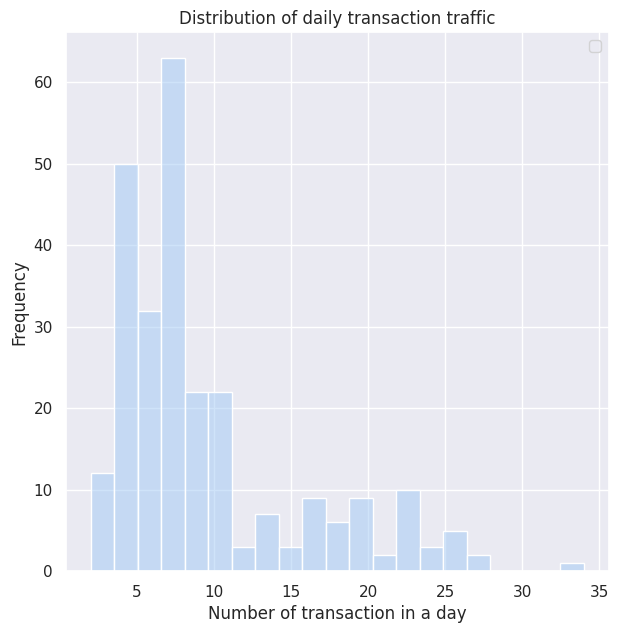

In [207]:
# Visualizing frequencies
## by date
date = trans_dates['date'].value_counts().reset_index()

plt.figure(figsize=(7, 7))
sns.histplot(data=date)
plt.xlabel('Number of transaction in a day')
plt.ylabel('Frequency')
plt.title('Distribution of daily transaction traffic')
plt.legend([])
plt.show()

#### Distribution of transaction volume by weekday

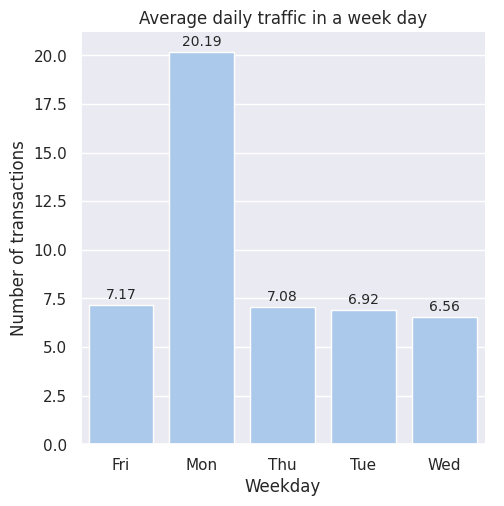

In [208]:
# by weekday
date['date'] = pd.to_datetime(date['date'],format='%Y%m%d')
date['weekday'] = date['date'].dt.strftime('%a')

weekdays_avg = date.groupby('weekday').agg({'count':'mean'}).reset_index()

plot = sns.catplot(data=weekdays_avg,x='weekday',y='count',kind='bar')

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 0.5, # y coordinate of text
        '{}'.format(round(h,2)),
        ha='center',
        va='center',
        size=10)

plt.title('Average daily traffic in a week day')
plt.xlabel('Weekday')
plt.ylabel('Number of transactions')

plt.show()


Except for Monday, most days average at around 7 transactions a day. Monday stood out at around 20 transactions per day. The pattern should be incorporated in anomaly detection later to reduce false positives.

### Distribution of some categorical data - TransactionType, Channel, and CustomerOccupation

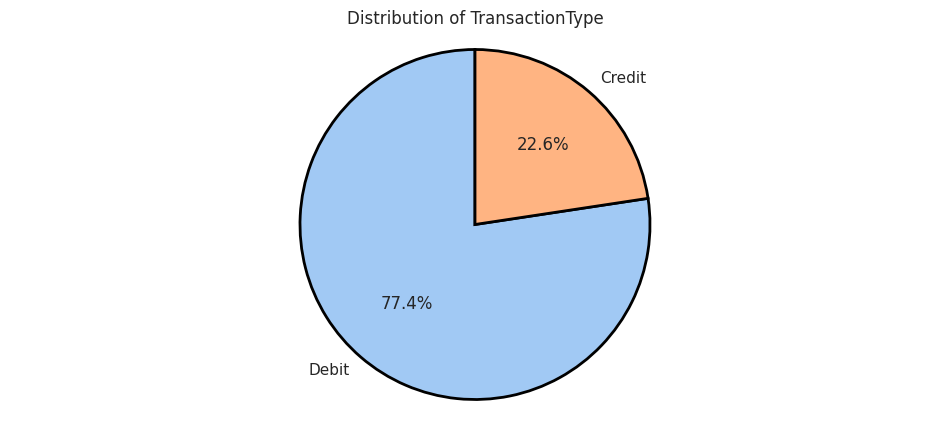

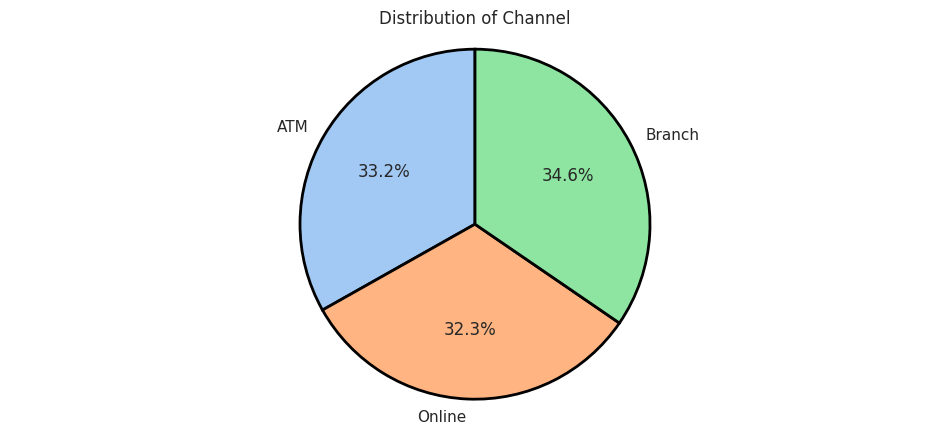

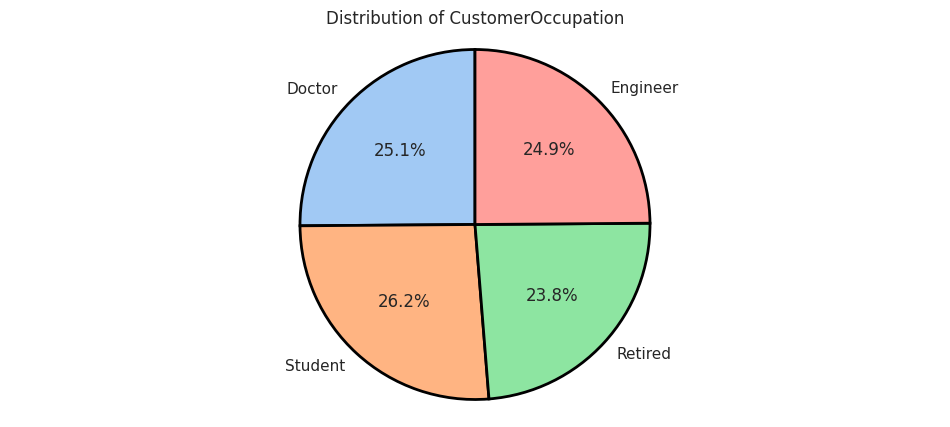

In [209]:
# Visualzing categorical data proportions with pie chart
values = []

for col in df.select_dtypes(include=['category']).columns:
  # Get unique labels
  labels = df[col].unique()
  # Count occurrences for each label
  for label in labels:
    count = df[df[col] == label][col].count()
    values.append(int(count))
  # Create pie chart
  plt.pie(values, labels=labels,
                      autopct='%1.1f%%',
                      startangle=90,
                      wedgeprops = {"edgecolor" : "black",
                      'linewidth': 2,
                      'antialiased': True})
  plt.title('Distribution of {}'.format(col))
  plt.axis('equal')  # Equal aspect ratio makes it a circle
  plt.show()
  values = []

Comment: Only for TransactionType, there is an imbalance proportion between the two types: 'Credit' and "Debit". A small sample size of Credit transactions might not cover an adequate number of patterns of fraud in real life.

### How many times do people usually attempt to login before transactions?

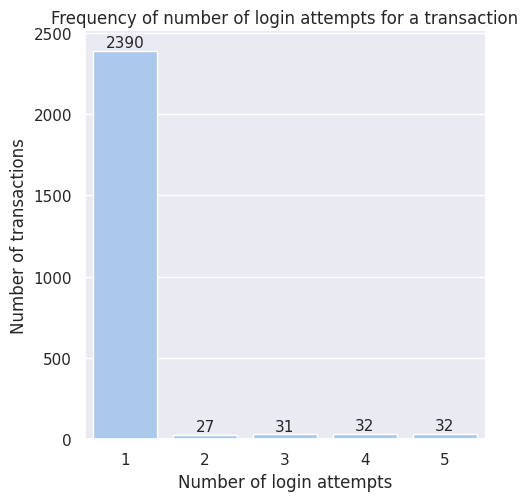

In [210]:
## Seeing LogicAttempts' values frequency
logins = df['LoginAttempts'].value_counts().reset_index()

plot = sns.catplot(x='LoginAttempts', y='count', kind='bar', data=logins)

### Adding data labels with plot.ax
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # x coordinate of text
        h + 50, # y coordinate of text
        '{}'.format(int(h)),
        ha='center',
        va='center',
        size=11)

plt.xlabel('Number of login attempts')
plt.ylabel('Number of transactions')
plt.title('Frequency of number of login attempts for a transaction')
plt.show()

### Distribution of monetary variables - TransactionAmount and AccountBalance

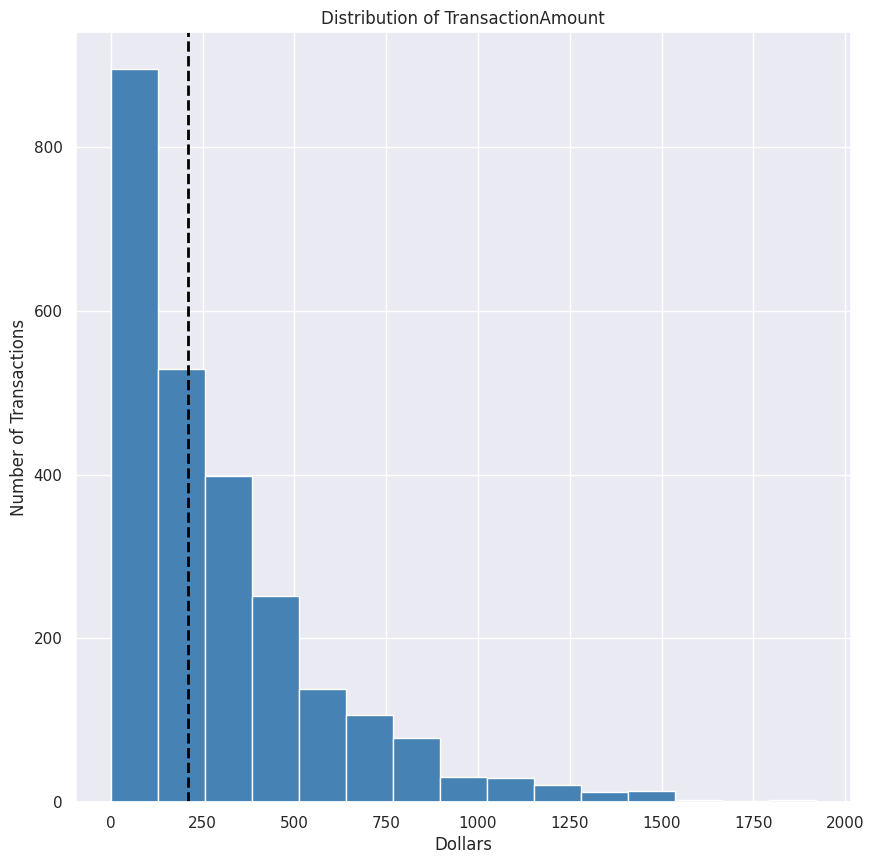

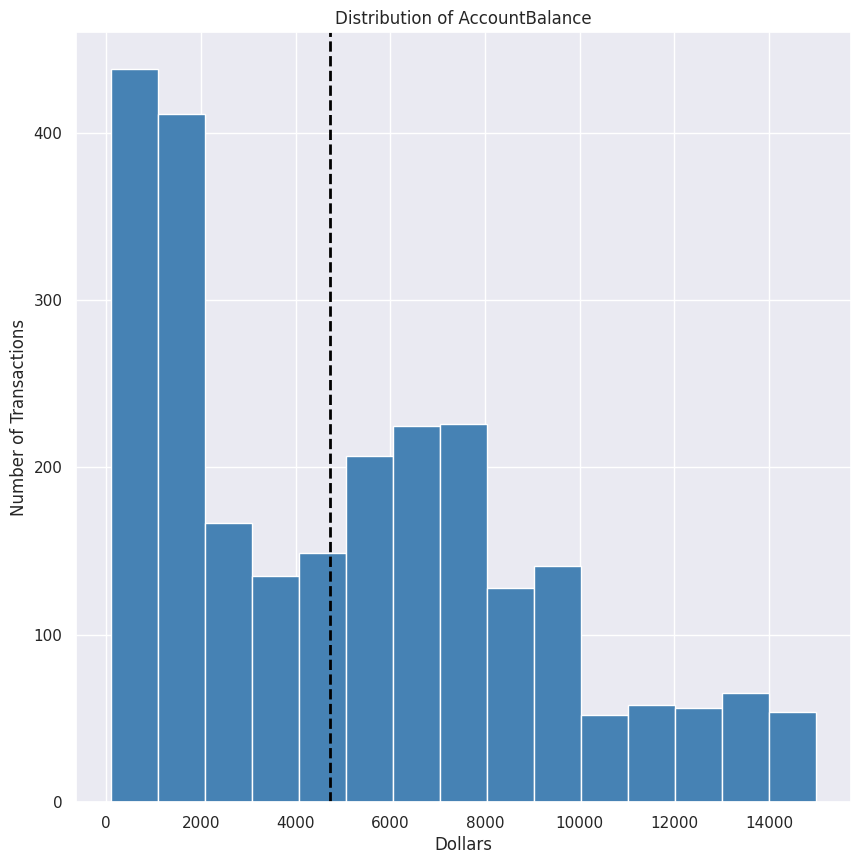

In [211]:
# Transaction Amount
moneys = ['TransactionAmount','AccountBalance']

for target in moneys:
  median = np.quantile(df[target],0.5)

  plt.figure(figsize=(10, 10))
  plt.hist(df[target], color='steelblue', ec='black', bins=15)
  plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label='Mean')
  plt.title('Distribution of {}'.format(target))
  plt.xlabel('Dollars')
  plt.ylabel('Number of Transactions')
  plt.show()

The black lines indicate where the median values stays.

### Transaction volume by locations

#### Ranking of location by transaction volume

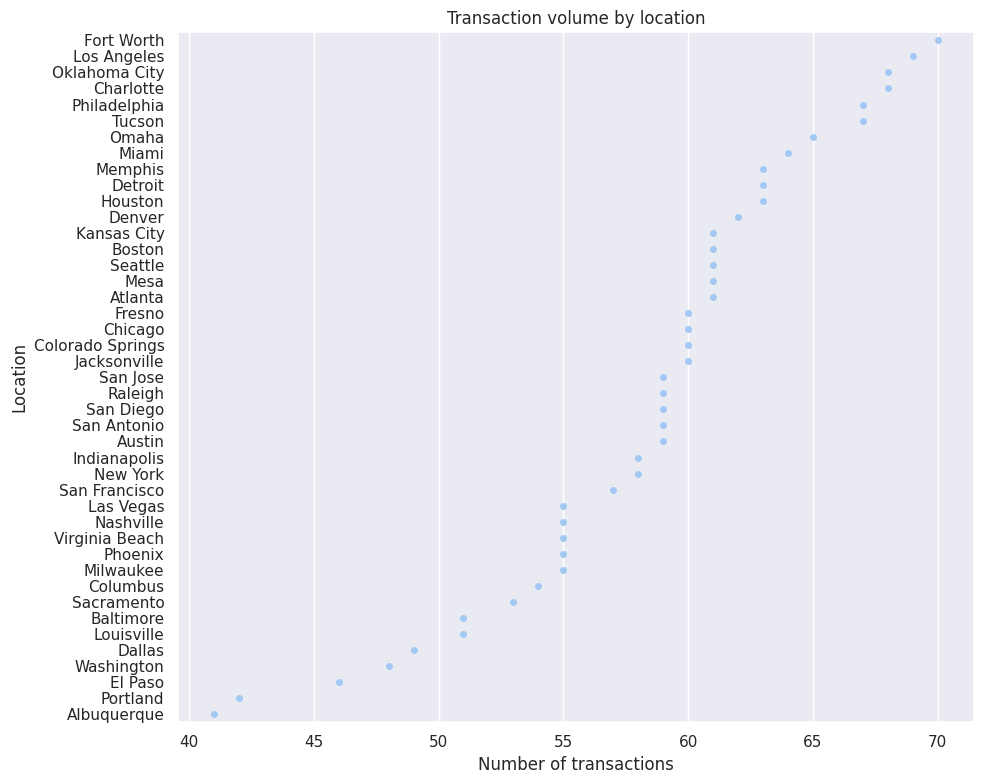

In [212]:
# Ranking of location by transaction volumes
loca = df['Location'].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 8))  # width=10 inches, height=8 inches

sns.stripplot(data=loca, y='Location', x='count', jitter=True)
plt.xlabel('Number of transactions')
plt.ylabel('Location')
plt.title('Transaction volume by location')
plt.tight_layout()
plt.show()

#### Transaction volume on a (interactive) map

In [213]:
# Visualizing transactive frequency by location onto map
## Extracting frequency for each location/city
city_counts = df['Location'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

## Geocoding city names
geolocator = Nominatim(user_agent="city_mapper", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

## Adding latitude and longitude columns
tqdm.pandas()
city_counts['location'] = city_counts['city'].progress_apply(geocode)
city_counts['lat'] = city_counts['location'].apply(lambda loc: loc.latitude if loc else None)
city_counts['lon'] = city_counts['location'].apply(lambda loc: loc.longitude if loc else None)

## Removing failed lookups
city_counts = city_counts.dropna(subset=['lat', 'lon'])

## PLotting map visualization
fig = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    size='count',
    color='count',
    hover_name='city',
    scope='usa',
    title='Transaction frequency by location/city',
    color_continuous_scale='Reds'
)
fig.show()

100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


Transaction volume by location generally decrease gradually from top to bottom. A notable steep drop is seen around 60 transactions mark.

### How frequently does each IP address get used?

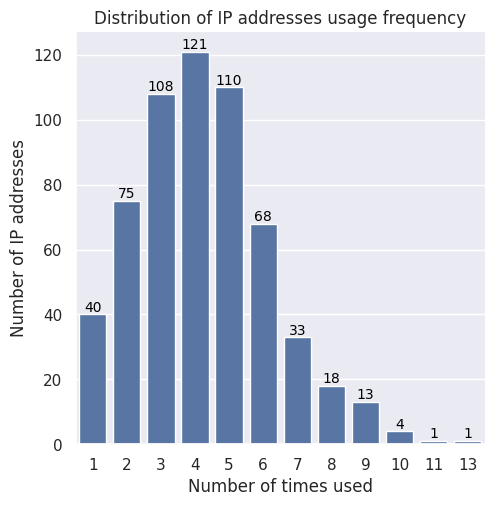

In [214]:
# Visualizing how frequently each IP address was used
IP = df['IP Address'].value_counts().sort_values(ascending=False).reset_index()
IP['freq'] = IP['count']
hist_IP_count = IP['freq'].value_counts().reset_index()
hist_IP_count = hist_IP_count.sort_values(by=['freq'])

sns.set_theme(rc={'figure.figsize': (12, 5)})
g = sns.catplot(data=hist_IP_count,x='freq',y='count',kind='bar')
# Get the axes object from the catplot
ax = g.facet_axis(0, 0)

# Add the data labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')
plt.xlabel('Number of times used')
plt.ylabel('Number of IP addresses')
plt.title('Distribution of IP addresses usage frequency')
plt.show()

### Distribution of transactions durations

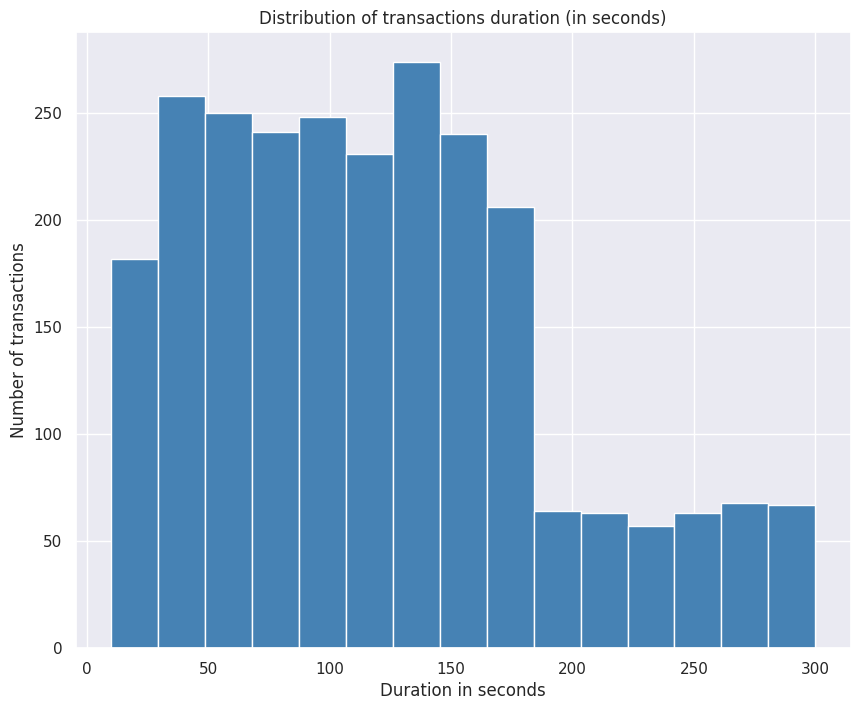

In [215]:
# Transaction amount
plt.figure(figsize=(10, 8))
plt.hist(df['TransactionDuration'], color='steelblue', ec='black', bins=15)
plt.xlabel('Duration in seconds')
plt.ylabel('Number of transactions')
plt.title('Distribution of transactions duration (in seconds)')
plt.show()

### Inspecting PreviousTransactionDate

In [216]:
check = df['PreviousTransactionDate'].sort_values()
print(check.head(10))
print(check.tail(10))

469    2024-11-04 08:06:23
2044   2024-11-04 08:06:23
1252   2024-11-04 08:06:23
35     2024-11-04 08:06:23
2157   2024-11-04 08:06:23
2107   2024-11-04 08:06:23
2423   2024-11-04 08:06:23
1249   2024-11-04 08:06:23
1913   2024-11-04 08:06:24
2114   2024-11-04 08:06:24
Name: PreviousTransactionDate, dtype: datetime64[ns]
291    2024-11-04 08:12:22
1453   2024-11-04 08:12:22
1234   2024-11-04 08:12:22
1414   2024-11-04 08:12:22
331    2024-11-04 08:12:22
2510   2024-11-04 08:12:22
1368   2024-11-04 08:12:22
234    2024-11-04 08:12:22
2038   2024-11-04 08:12:23
1344   2024-11-04 08:12:23
Name: PreviousTransactionDate, dtype: datetime64[ns]


## Bivariate Analysis
Bivariate analysis will look through how 2 variables interact with one another. This will largely be guided by documentation of author on how variables are synthesized.

### Transactional activities by accounts

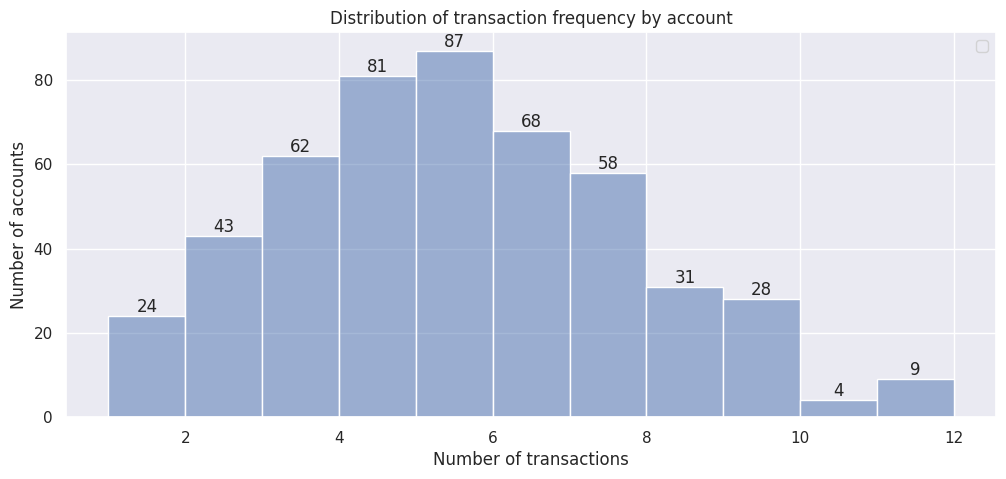

In [217]:
# Transactions per accounts
accounts_trans = df.groupby('AccountID').agg({'TransactionID':'count'}).sort_values(by='TransactionID',ascending=False)
accounts_trans = accounts_trans.rename(columns={'TransactionID': 'No_of_transactions'})

ax = sns.histplot(data=accounts_trans)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Number of transactions')
plt.ylabel('Number of accounts')
plt.legend([])
plt.title('Distribution of transaction frequency by account')
plt.show()

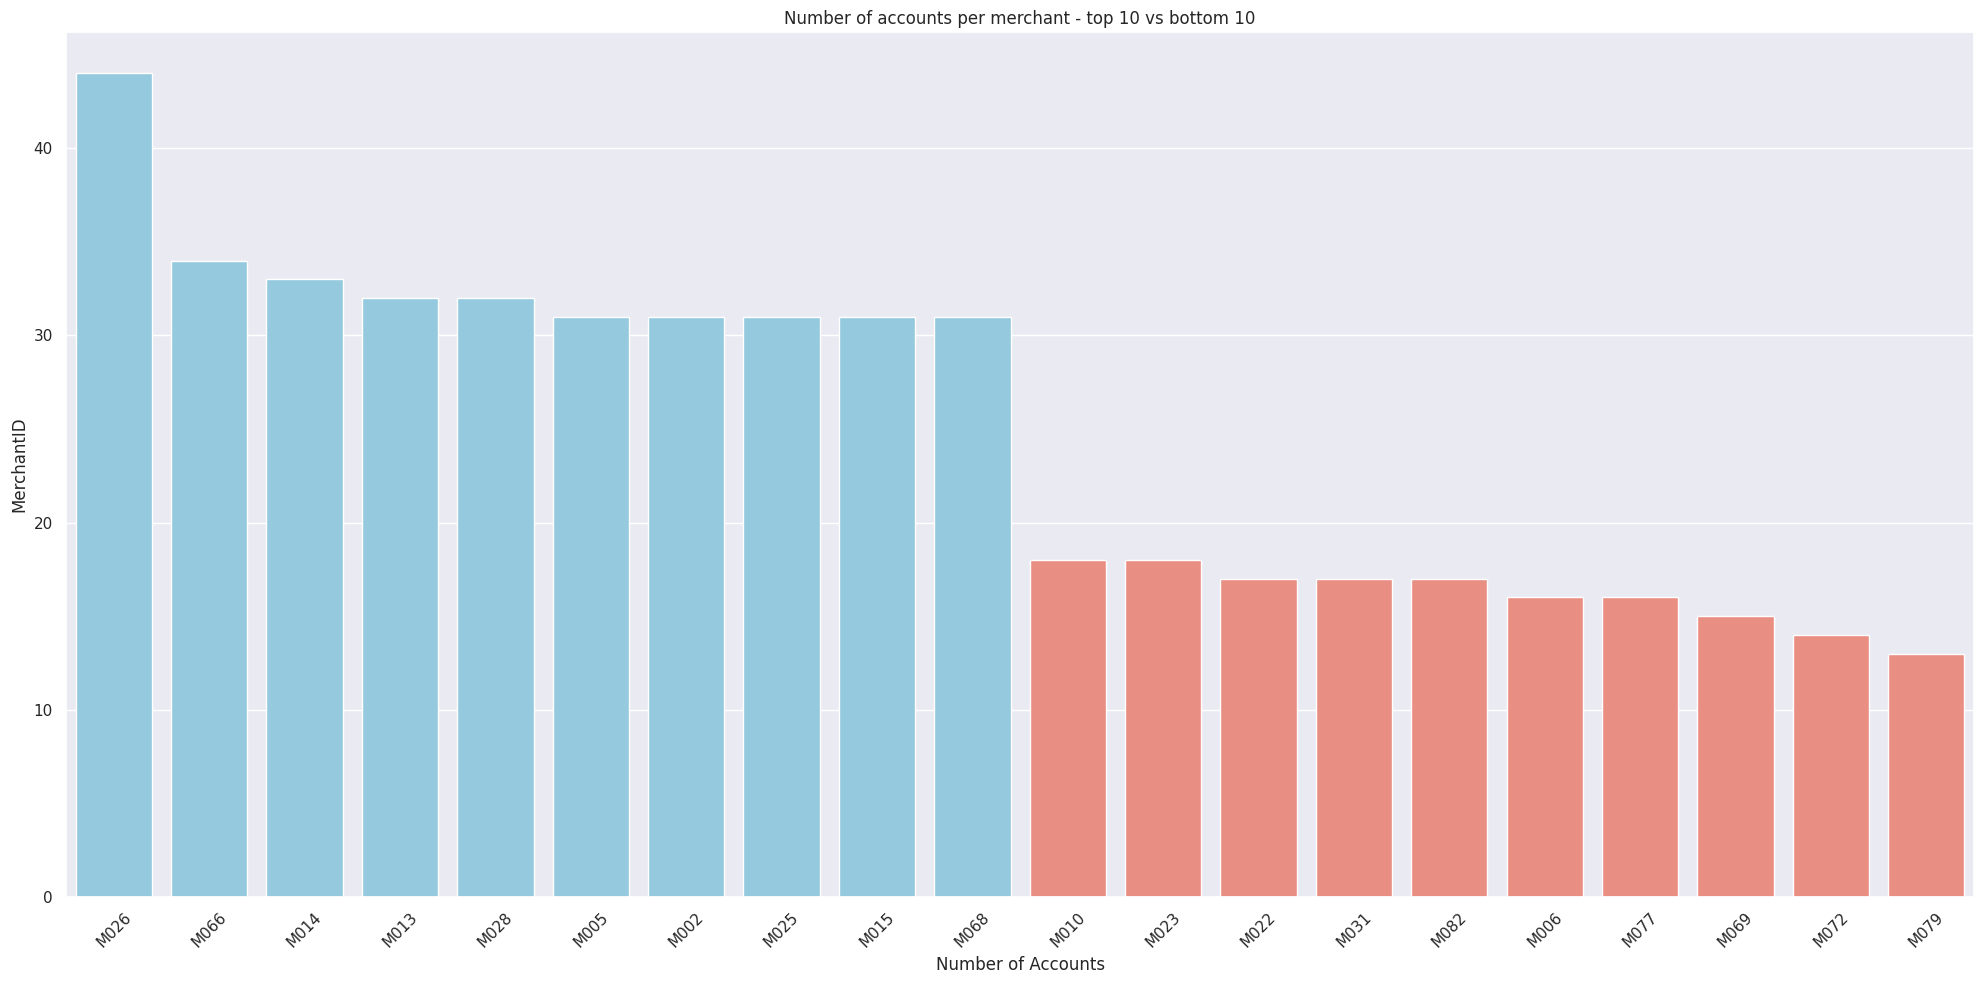

In [221]:
# Preferred merchants by account holders
mercs = df.groupby(['MerchantID']).agg({'AccountID':'nunique'}).reset_index()
mercs = mercs.sort_values(by='AccountID',ascending=False)
mercs_top_10 = mercs.head(10)
mercs_bot_10 = mercs.tail(10)
mercs_diff = pd.concat([mercs_top_10, mercs_bot_10])

plt.figure(figsize=(20, 10))

sns.barplot(data=mercs_top_10, x='MerchantID', y='AccountID', color= 'skyblue')
sns.barplot(data=mercs_bot_10, x='MerchantID', y='AccountID', color = 'salmon')
plt.xlabel('Number of Accounts')
plt.xticks(rotation=45)
plt.ylabel('MerchantID')
plt.title('Number of accounts per merchant - top 10 vs bottom 10')
plt.tight_layout()
plt.show()

### Effect of occupation group on numerical variables

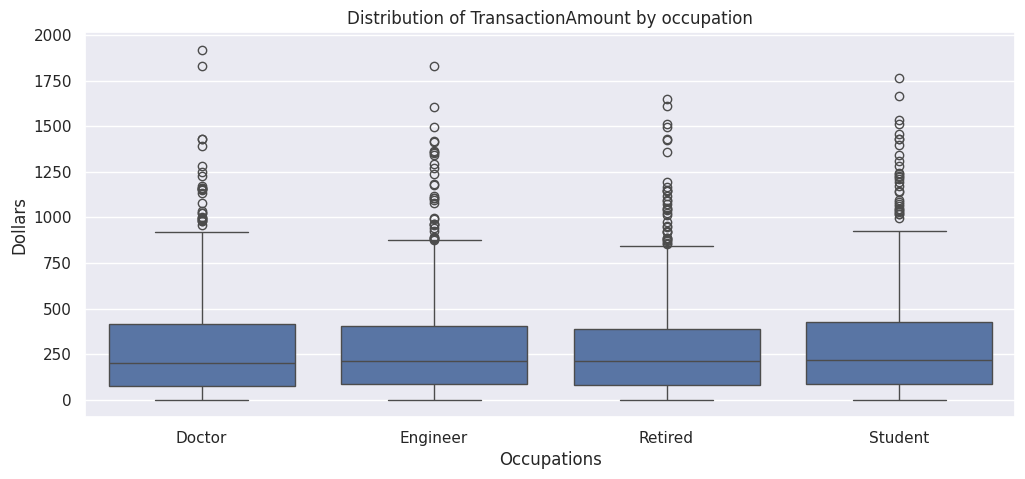

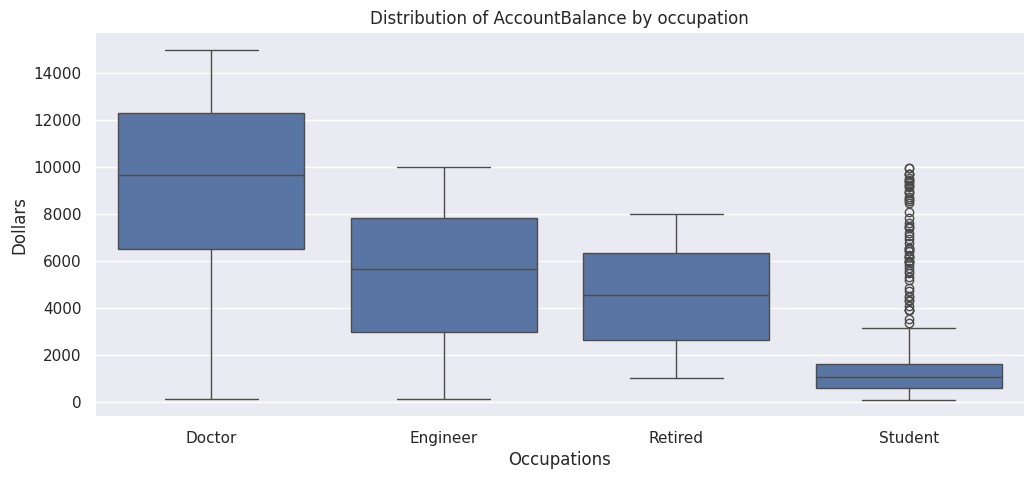

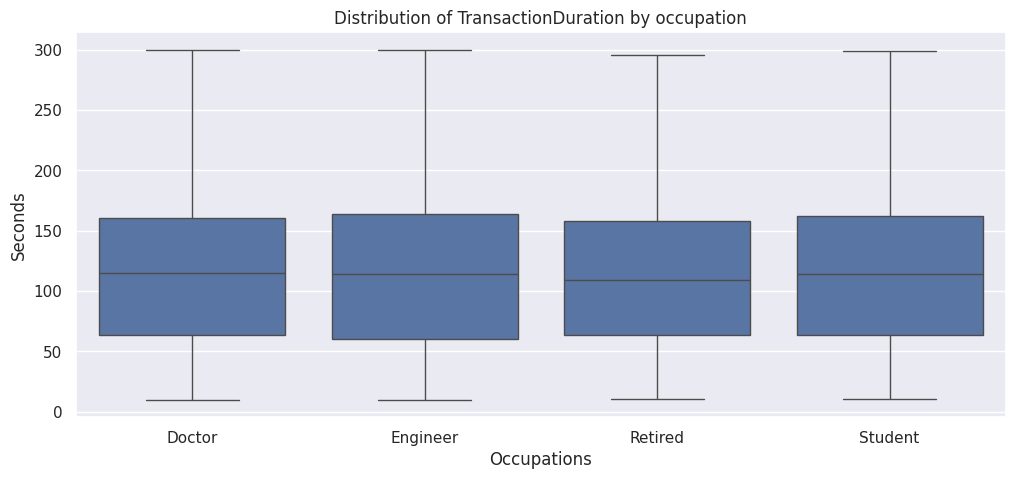

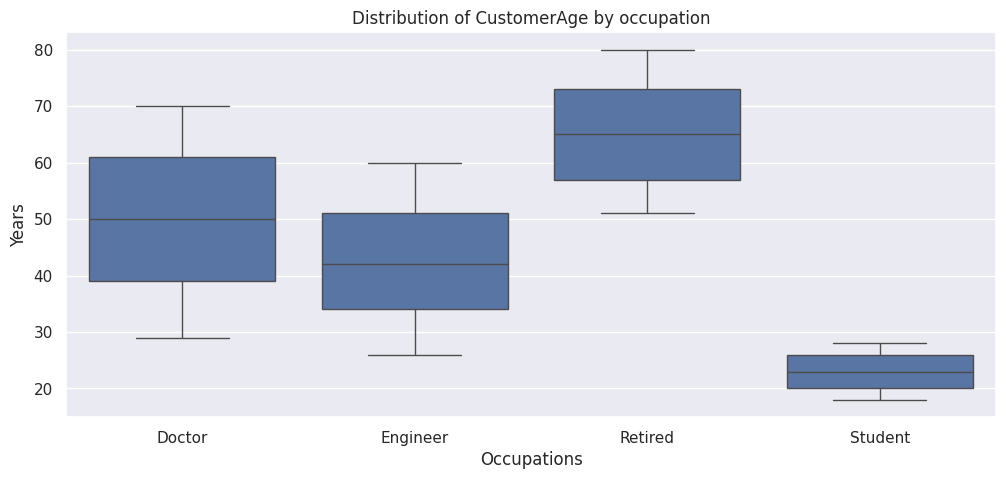

In [222]:
targets = ['TransactionAmount','AccountBalance','TransactionDuration','CustomerAge']
units = {'TransactionAmount':'Dollars',
          'AccountBalance':'Dollars',
          'TransactionDuration':'Seconds',
          'CustomerAge':'Years'}

for target in targets:
  # Customer age in different professions
  ax = sns.boxplot(data=df,x='CustomerOccupation',y=target)
  plt.xlabel('Occupations')
  plt.ylabel(units[target])
  plt.title('Distribution of {} by occupation'.format(target))
  plt.show()
  print('')
  print('')
  print('')

### Effect of transaction type on numerical variables

In [223]:
# Slicing data into credit and debit groups
df_cred = df[df['TransactionType'] == 'Credit']
df_debi = df[df['TransactionType'] == 'Debit']
print(df_cred.shape)
print(df_debi.shape)

(568, 16)
(1944, 16)


In [224]:
df_cred.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,568.000000,568,568.000000,568.000000,568.000000,568.000000,568
mean,306.501004,2023-07-12 10:37:52.033450752,46.153169,119.394366,1.144366,5249.332799,2024-11-04 08:09:19.801056512
min,2.030000,2023-01-02 16:01:14,18.000000,10.000000,1.000000,105.010000,2024-11-04 08:06:23
25%,80.012500,2023-04-14 17:24:58.249999872,28.000000,64.000000,1.000000,1622.630000,2024-11-04 08:07:47
50%,223.360000,2023-07-17 17:32:21.500000,48.000000,109.000000,1.000000,4830.895000,2024-11-04 08:09:16
75%,425.220000,2023-10-11 23:37:56,60.000000,159.250000,1.000000,7820.770000,2024-11-04 08:10:53.249999872
max,1831.020000,2024-01-01 16:53:32,80.000000,294.000000,5.000000,14935.500000,2024-11-04 08:12:23
std,290.027618,NaN,17.730775,68.107365,0.658899,4013.817889,NaN


In [225]:
df_debi.describe()

,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,1944.000000,1944,1944.000000,1944.000000,1944.000000,1944.000000,1944
mean,294.991255,2023-07-03 22:20:38.539609088,44.241770,119.716049,1.118827,5074.849805,2024-11-04 08:09:22.926440448
min,0.260000,2023-01-02 16:00:06,18.000000,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,83.137500,2023-03-30 16:07:10.750000128,27.000000,63.000000,1.000000,1482.977500,2024-11-04 08:07:55
50%,205.140000,2023-07-04 18:38:15,44.000000,114.000000,1.000000,4710.125000,2024-11-04 08:09:23
75%,407.785000,2023-10-04 23:56:09.750000128,59.000000,162.000000,1.000000,7630.422500,2024-11-04 08:10:53.249999872
max,1919.110000,2024-01-01 18:21:50,80.000000,300.000000,5.000000,14977.990000,2024-11-04 08:12:23
std,292.527512,NaN,17.791443,70.513970,0.585267,3867.504758,NaN


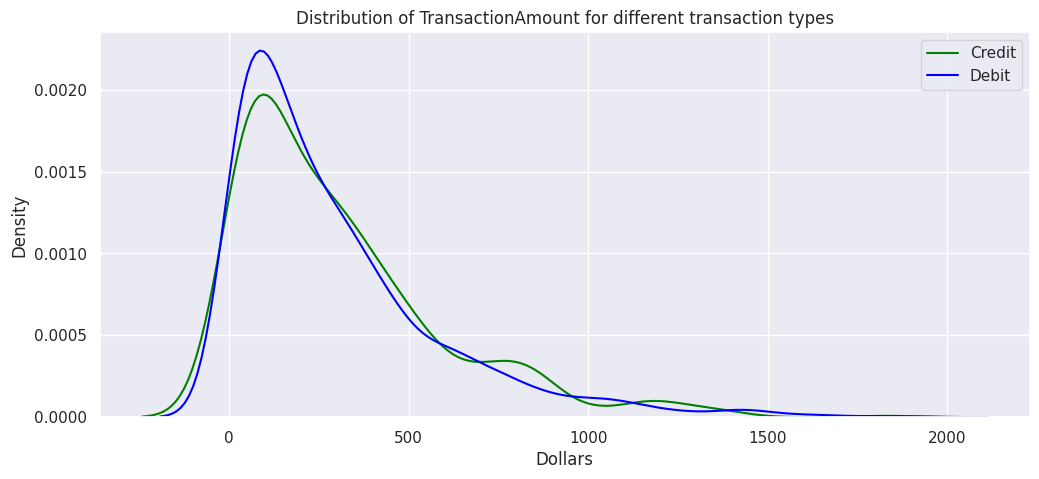

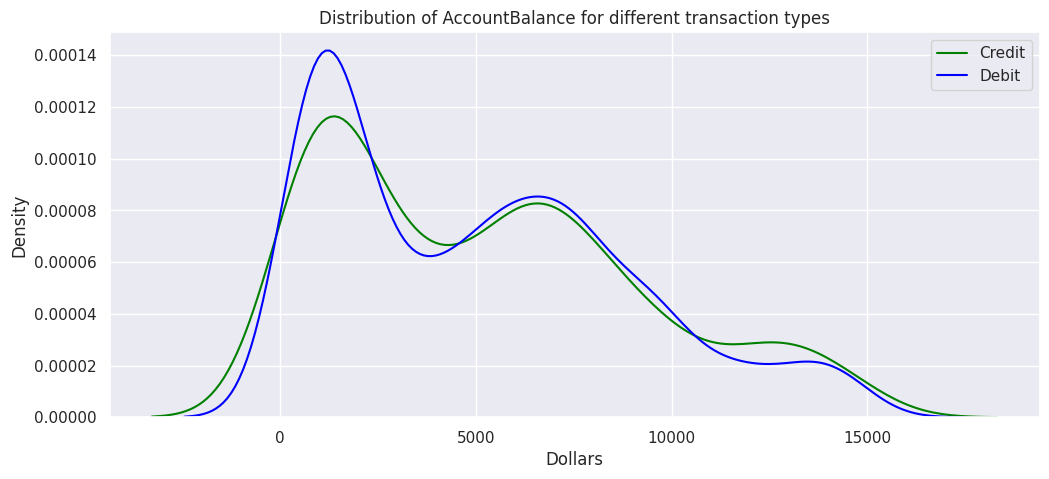

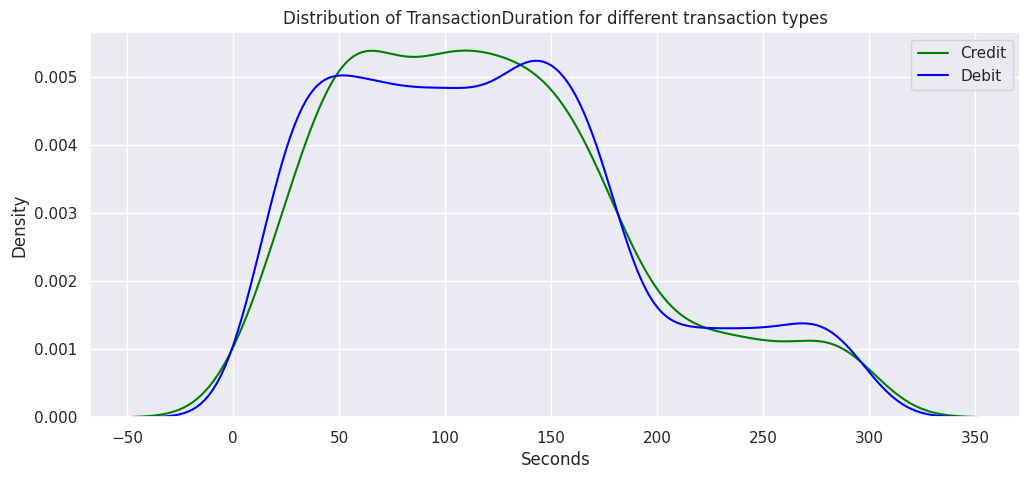

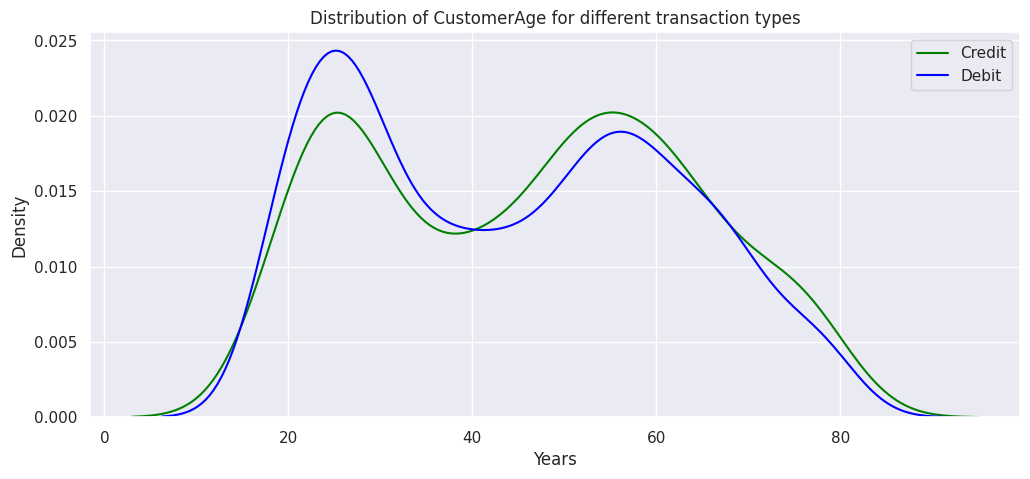

In [226]:
# Visualizations
targets = ['TransactionAmount','AccountBalance','TransactionDuration','CustomerAge']
units = {'TransactionAmount':'Dollars',
          'AccountBalance':'Dollars',
          'TransactionDuration':'Seconds',
          'CustomerAge':'Years'}

for target in targets:
  sns.kdeplot(df_cred[target],color='green',label='Credit')
  sns.kdeplot(df_debi[target],color='blue',label='Debit')
  plt.xlabel(units[target])
  plt.title('Distribution of {} for different transaction types'.format(target))
  plt.legend()
  plt.show()

### Effect of Channel on transaction amount and transaction duration

In [227]:
# Slicing data by channel
df_atm = df[df['Channel'] == 'ATM']
df_bra = df[df['Channel'] == 'Branch']
df_onl = df[df['Channel'] == 'Online']
print(df_atm.shape)
print(df_bra.shape)
print(df_onl.shape)

(833, 16)
(868, 16)
(811, 16)


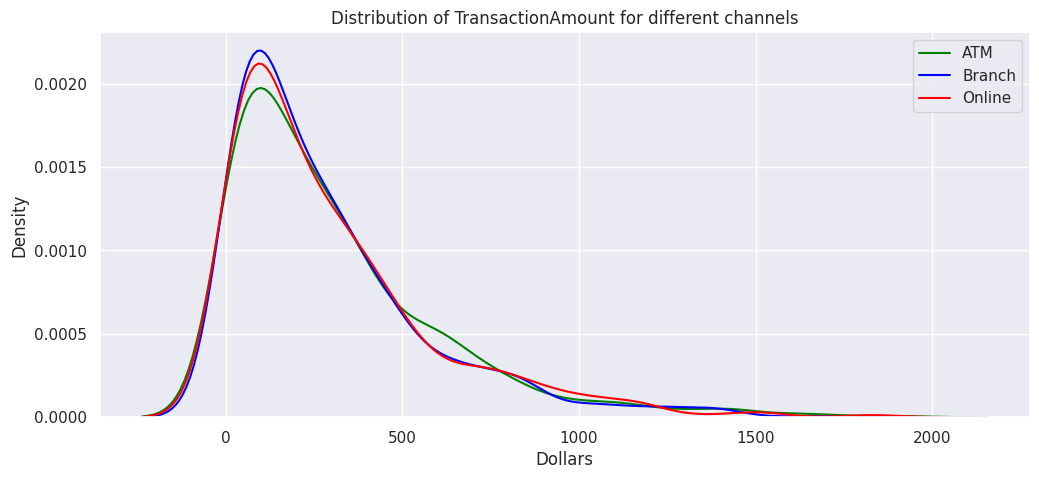

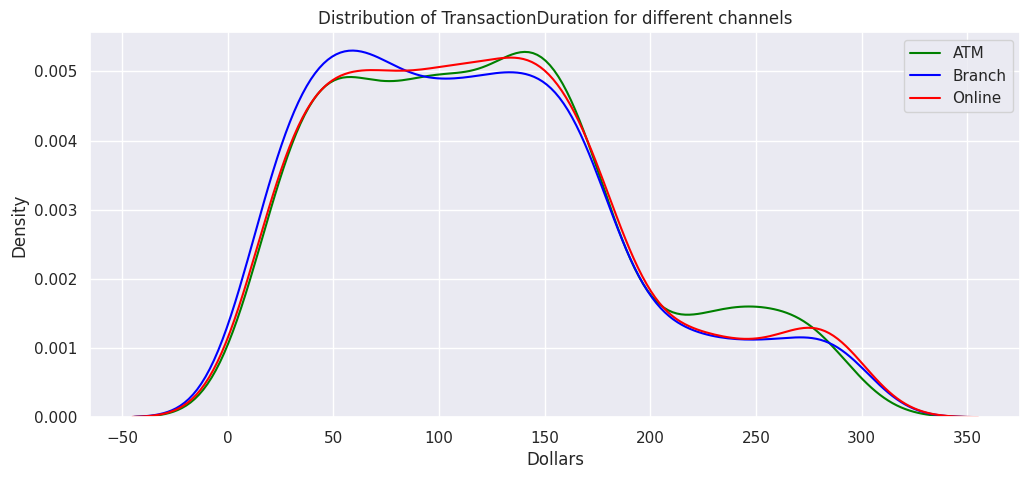

In [228]:
# Visualizations
targets = ['TransactionAmount' ,'TransactionDuration']

for target in targets:
  sns.kdeplot(df_atm[target],color='green',label='ATM')
  sns.kdeplot(df_bra[target],color='blue',label='Branch')
  sns.kdeplot(df_onl[target],color='red',label='Online')
  plt.xlabel('Dollars')
  plt.title('Distribution of {} for different channels'.format(target))
  plt.legend()
  plt.show()

# Data Preprocessing and Feature Engineering (TBD; if needed)

# Machine Learning - Unsupervised - Anomalies Detection (TBD)

In [229]:
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [230]:
# Selecting features for model
target = ['TransactionAmount','TransactionDuration']

In [231]:
# Initializing a model with 3 clusters
model = KMeans(n_clusters =3)